In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import random
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.utils import class_weight
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)  # Test verisi için sadece normalizasyon

train_generator = train_datagen.flow_from_directory(
    '/drive/MyDrive/Data/BreaKHis 400X/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/drive/MyDrive/Data/BreaKHis 400X/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 1148 images belonging to 2 classes.
Found 545 images belonging to 2 classes.


In [ ]:
# Eğitim setindeki sınıfları al
train_labels = train_generator.classes

# Sınıf ağırlıklarını hesapla
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)

class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)


Class Weights: {0: 1.5471698113207548, 1: 0.7387387387387387}


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Model yapısını çizdirme
plot_model(model, to_file='/drive/MyDrive/model_yapısı.png', show_shapes=True, show_layer_names=True)

# Model özetini yazdırma
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 148, 148, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                      

In [ ]:
# Optimizer ve modelin derlenmesi
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Modeli sınıf ağırlıkları ile eğitme
history = model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=60,
    validation_data=validation_generator,
    validation_steps=20,
    class_weight=class_weights_dict,  # Sınıf ağırlıklarını ekledik
)

Epoch 1/60
30/30 [==============================] - 284s 9s/step - loss: 1.9379 - accuracy: 0.7619 - val_loss: 1.7344 - val_accuracy: 0.3150
Epoch 2/60
30/30 [==============================] - 121s 4s/step - loss: 1.7976 - accuracy: 0.7517 - val_loss: 1.6819 - val_accuracy: 0.6575
Epoch 3/60
30/30 [==============================] - 76s 3s/step - loss: 1.6100 - accuracy: 0.7738 - val_loss: 1.6857 - val_accuracy: 0.6775
Epoch 4/60
30/30 [==============================] - 67s 2s/step - loss: 1.5313 - accuracy: 0.7967 - val_loss: 2.1054 - val_accuracy: 0.6825
Epoch 5/60
30/30 [==============================] - 73s 2s/step - loss: 1.4915 - accuracy: 0.8067 - val_loss: 2.4815 - val_accuracy: 0.6825
Epoch 6/60
30/30 [==============================] - 67s 2s/step - loss: 1.4879 - accuracy: 0.8133 - val_loss: 2.5630 - val_accuracy: 0.6775
Epoch 7/60
30/30 [==============================] - 71s 2s/step - loss: 1.3068 - accuracy: 0.8469 - val_loss: 3.0303 - val_accuracy: 0.6800
Epoch 8/60
30/30 [

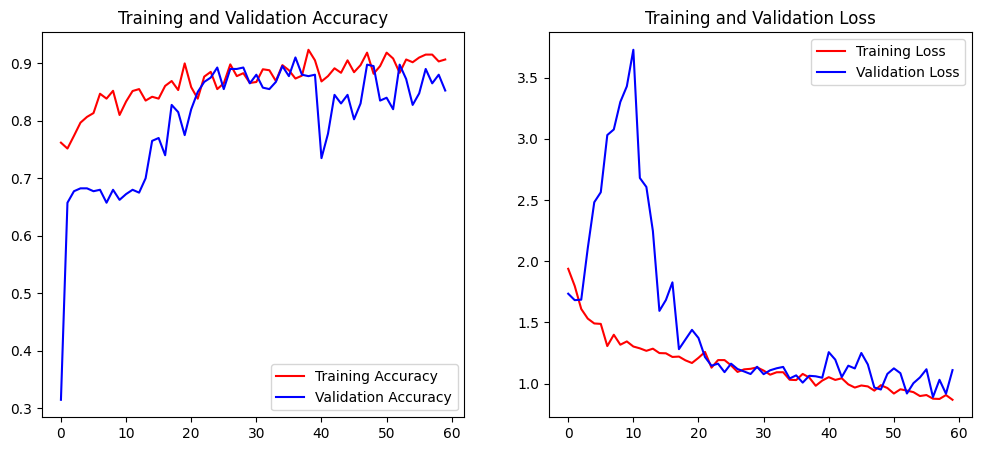

En yüksek Eğitim Doğruluğu: 0.9233333468437195
En Yüksek Doğrulama Doğruluğu: 0.9100000262260437
En Düşük Eğitim Doğruluğu: 0.8680935502052307
En Düşük Doğrulama Kaybı: 0.8902549743652344


In [ ]:
# Train ve validation için doğruluk ve kaybı görselleştirme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

highest_training_accuracy = max(acc)
highest_validation_accuracy = max(val_acc)
lowest_training_loss = min(loss)
lowest_validation_loss = min(val_loss)

print("En yüksek Eğitim Doğruluğu:", highest_training_accuracy)
print("En Yüksek Doğrulama Doğruluğu:", highest_validation_accuracy)
print("En Düşük Eğitim Doğruluğu:", lowest_training_loss)
print("En Düşük Doğrulama Kaybı:", lowest_validation_loss)


28/28 [==============================] - 18s 613ms/step
Accuracy (Doğruluk): 0.5834862385321101
Precision (Kesinlik): 0.6666666666666666
Recall (Geri Çağırma): 0.7696476964769647
F1 Score: 0.7144654088050314

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.29      0.19      0.23       176
           1       0.67      0.77      0.71       369

    accuracy                           0.58       545
   macro avg       0.48      0.48      0.47       545
weighted avg       0.54      0.58      0.56       545


Karışıklık Matrisi:
 [[ 34 142]
 [ 85 284]]


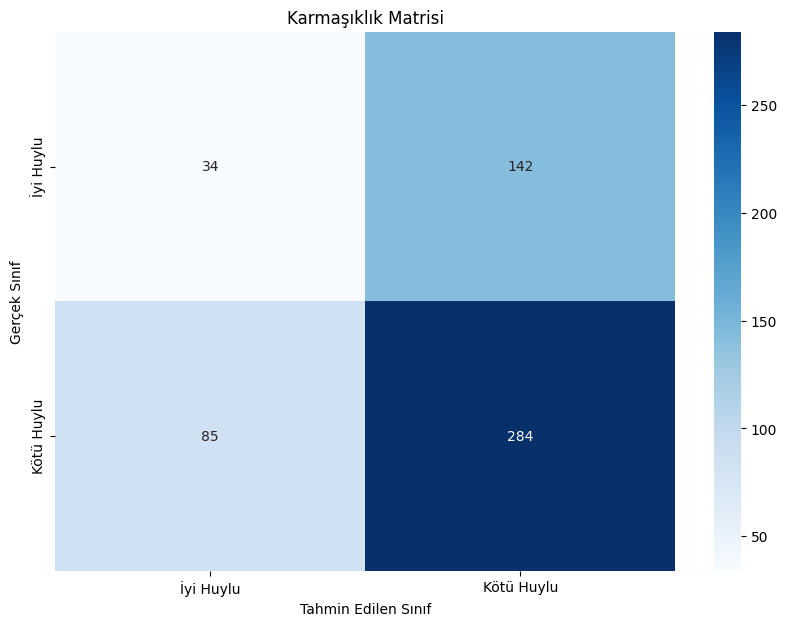

In [ ]:
# Tahminlerin yapılması
validation_generator.reset()
preds = model.predict(validation_generator, steps=len(validation_generator), verbose=1)
preds = np.round(preds).astype(int).reshape(-1)

# Gerçek etiketlerin alınması
true_labels = validation_generator.classes

# Metriklerin hesaplanması
accuracy = accuracy_score(true_labels, preds)
precision = precision_score(true_labels, preds)
recall = recall_score(true_labels, preds)
f1 = f1_score(true_labels, preds)

print("Accuracy (Doğruluk):", accuracy)
print("Precision (Kesinlik):", precision)
print("Recall (Geri Çağırma):", recall)
print("F1 Score:", f1)

# Ayrıntılı sınıflandırma raporu
print("\nSınıflandırma Raporu:\n", classification_report(true_labels, preds))

# Confusion Matrix (Karmaşıklık Matrisi)
conf_matrix = confusion_matrix(true_labels, preds)
print("\nKarışıklık Matrisi:\n", conf_matrix)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['İyi Huylu', 'Kötü Huylu'], yticklabels=['İyi Huylu', 'Kötü Huylu'])
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()